# Random Forest Algorithm #

Random Forest Algorithm implemantation on dataset

# Importing Libraries #

Importing the required libraries

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv("D:/Users/Atilla/Desktop/Tez/Data/classification/c_mutlu.csv")
data

,Mutluluk,Fomo,Nevrotik,Disdon,Acikfikir,Yumbas,Durust,Mobba,Oyba,Sosvirtol,Sosvirco,Sosvirpro,Sosvirinfo,Target
0,2.48,3.05,4.4,1.2,4.0,3.2,2.2,3.03,4.67,3.0,3.00,3.22,3.50,0
1,3.86,2.82,3.4,5.0,5.0,3.8,4.2,2.58,1.22,3.2,2.78,1.89,3.50,1
2,3.29,1.50,3.4,3.6,3.2,4.0,3.8,1.21,0.00,1.8,1.33,1.00,1.83,1
3,3.82,3.23,1.6,5.0,4.6,4.6,4.6,4.30,0.00,5.0,4.67,4.00,3.67,1
4,3.77,2.86,2.0,4.0,5.0,3.0,3.8,2.00,1.78,2.2,2.44,2.56,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,3.24,4.36,3.4,2.6,1.2,1.8,1.2,3.88,0.00,4.6,3.78,3.56,4.33,1
493,2.52,3.95,4.2,2.6,3.8,4.2,4.0,2.33,0.00,4.0,1.11,1.44,3.67,1
494,4.34,2.59,2.6,2.6,4.8,3.6,3.8,1.30,2.33,1.8,2.33,1.78,3.50,1
495,3.66,1.41,3.2,3.2,4.8,3.0,1.6,1.64,2.67,3.2,2.11,2.56,2.83,1


Modify the dataset for classification problem
The output/target class is set 'Mutluluk' column

In [47]:
data_mutlu = data.drop(['Mutluluk'], axis=1)
data_mutlu

,Fomo,Nevrotik,Disdon,Acikfikir,Yumbas,Durust,Mobba,Oyba,Sosvirtol,Sosvirco,Sosvirpro,Sosvirinfo,Target
0,3.05,4.4,1.2,4.0,3.2,2.2,3.03,4.67,3.0,3.00,3.22,3.50,0
1,2.82,3.4,5.0,5.0,3.8,4.2,2.58,1.22,3.2,2.78,1.89,3.50,1
2,1.50,3.4,3.6,3.2,4.0,3.8,1.21,0.00,1.8,1.33,1.00,1.83,1
3,3.23,1.6,5.0,4.6,4.6,4.6,4.30,0.00,5.0,4.67,4.00,3.67,1
4,2.86,2.0,4.0,5.0,3.0,3.8,2.00,1.78,2.2,2.44,2.56,2.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,4.36,3.4,2.6,1.2,1.8,1.2,3.88,0.00,4.6,3.78,3.56,4.33,1
493,3.95,4.2,2.6,3.8,4.2,4.0,2.33,0.00,4.0,1.11,1.44,3.67,1
494,2.59,2.6,2.6,4.8,3.6,3.8,1.30,2.33,1.8,2.33,1.78,3.50,1
495,1.41,3.2,3.2,4.8,3.0,1.6,1.64,2.67,3.2,2.11,2.56,2.83,1


In [48]:
data_mutlu['Target'].value_counts()

1    459
0     38
Name: Target, dtype: int64

In [49]:
X = data_mutlu.drop(["Target"], axis=1)
y = data_mutlu["Target"]

# Oversampling method for unbalanced dataset #

Importing the imblearn library for oversampling method

In [50]:
!pip install imblearn

You should consider upgrading via the 'c:\users\atilla\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
y_smote

0      0
1      1
2      1
3      1
4      1
      ..
913    0
914    0
915    0
916    0
917    0
Name: Target, Length: 918, dtype: int64

In [52]:
df_X_smote = pd.DataFrame(X_smote)
df_y_smote = pd.DataFrame(y_smote)
df_y_smote

,Target
0,0
1,1
2,1
3,1
4,1
...,...
913,0
914,0
915,0
916,0


# Random Forest Algorithm Model #

## Dataset Split ##

Split the data to train and test

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Train-Test Data for test size %33
X_train, X_test, y_train, y_test = train_test_split(df_X_smote, df_y_smote, test_size=0.33, random_state=42, stratify=y_smote)
rand_f2 = RandomForestClassifier(n_estimators=100, random_state=42)
rand_f2.fit(X_train, y_train.values)
predictions = rand_f2.predict(X_test)

<ipython-input-72-2a2440f1f33b>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_f2.fit(X_train, y_train.values)


# Evaluation #

Accuracy score: 0.96
Random Forest Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       152
           1       0.98      0.94      0.96       151

    accuracy                           0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303

Text(0.5, 15.0, 'Predicted Values')
Text(33.0, 0.5, 'Actual Values')
Text(0.5, 1.0, 'Accuracy Score: 0.96')


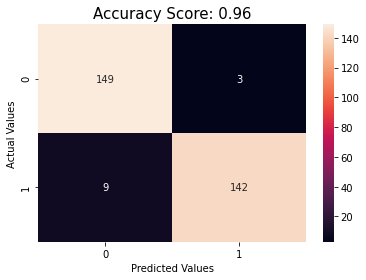

None


In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report

score = round(accuracy_score(y_test, predictions), 2)
print("Accuracy score:", score)
print("Random Forest Classification report:" '\n', classification_report(y_test, predictions))
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
print(plt.xlabel('Predicted Values'))
print(plt.ylabel('Actual Values'))
print(plt.title('Accuracy Score: {0}'.format(score), size=15))
print(plt.show())

# Feature Importance of Model #

Text(0.5, 1.03, 'Rastgele Orman Algoritması Öznitelik Önem Sıralaması')
<BarContainer object of 10 artists>
([<matplotlib.axis.XTick object at 0x0000019B1AF34250>, <matplotlib.axis.XTick object at 0x0000019B1AF34220>, <matplotlib.axis.XTick object at 0x0000019B1AFC9B50>, <matplotlib.axis.XTick object at 0x0000019B1B028400>, <matplotlib.axis.XTick object at 0x0000019B1B028910>, <matplotlib.axis.XTick object at 0x0000019B1B028E20>, <matplotlib.axis.XTick object at 0x0000019B1B176370>, <matplotlib.axis.XTick object at 0x0000019B1B028520>, <matplotlib.axis.XTick object at 0x0000019B1B1766D0>, <matplotlib.axis.XTick object at 0x0000019B1B176BE0>], [Text(0, 0, 'Nevrotik'), Text(1, 0, 'Durust'), Text(2, 0, 'Disdon'), Text(3, 0, 'Mobba'), Text(4, 0, 'Yumbas'), Text(5, 0, 'Sosvirtol'), Text(6, 0, 'Sosvirinfo'), Text(7, 0, 'Sosvirco'), Text(8, 0, 'Acikfikir'), Text(9, 0, 'Sosvirpro')])


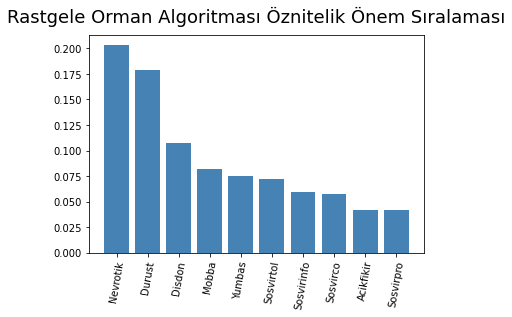

None


In [74]:
# Önemli öznitelikleri belirleme
ranking = rand_f2.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns
print(plt.title("Rastgele Orman Algoritması Öznitelik Önem Sıralaması", y=1.03, size=18))
print(plt.bar(range(len(features)), ranking[features], color="steelblue", align="center"))
print(plt.xticks(range(len(features)), columns[features], rotation=80))
print(plt.show())

# Visualize the Random Forest Tree #

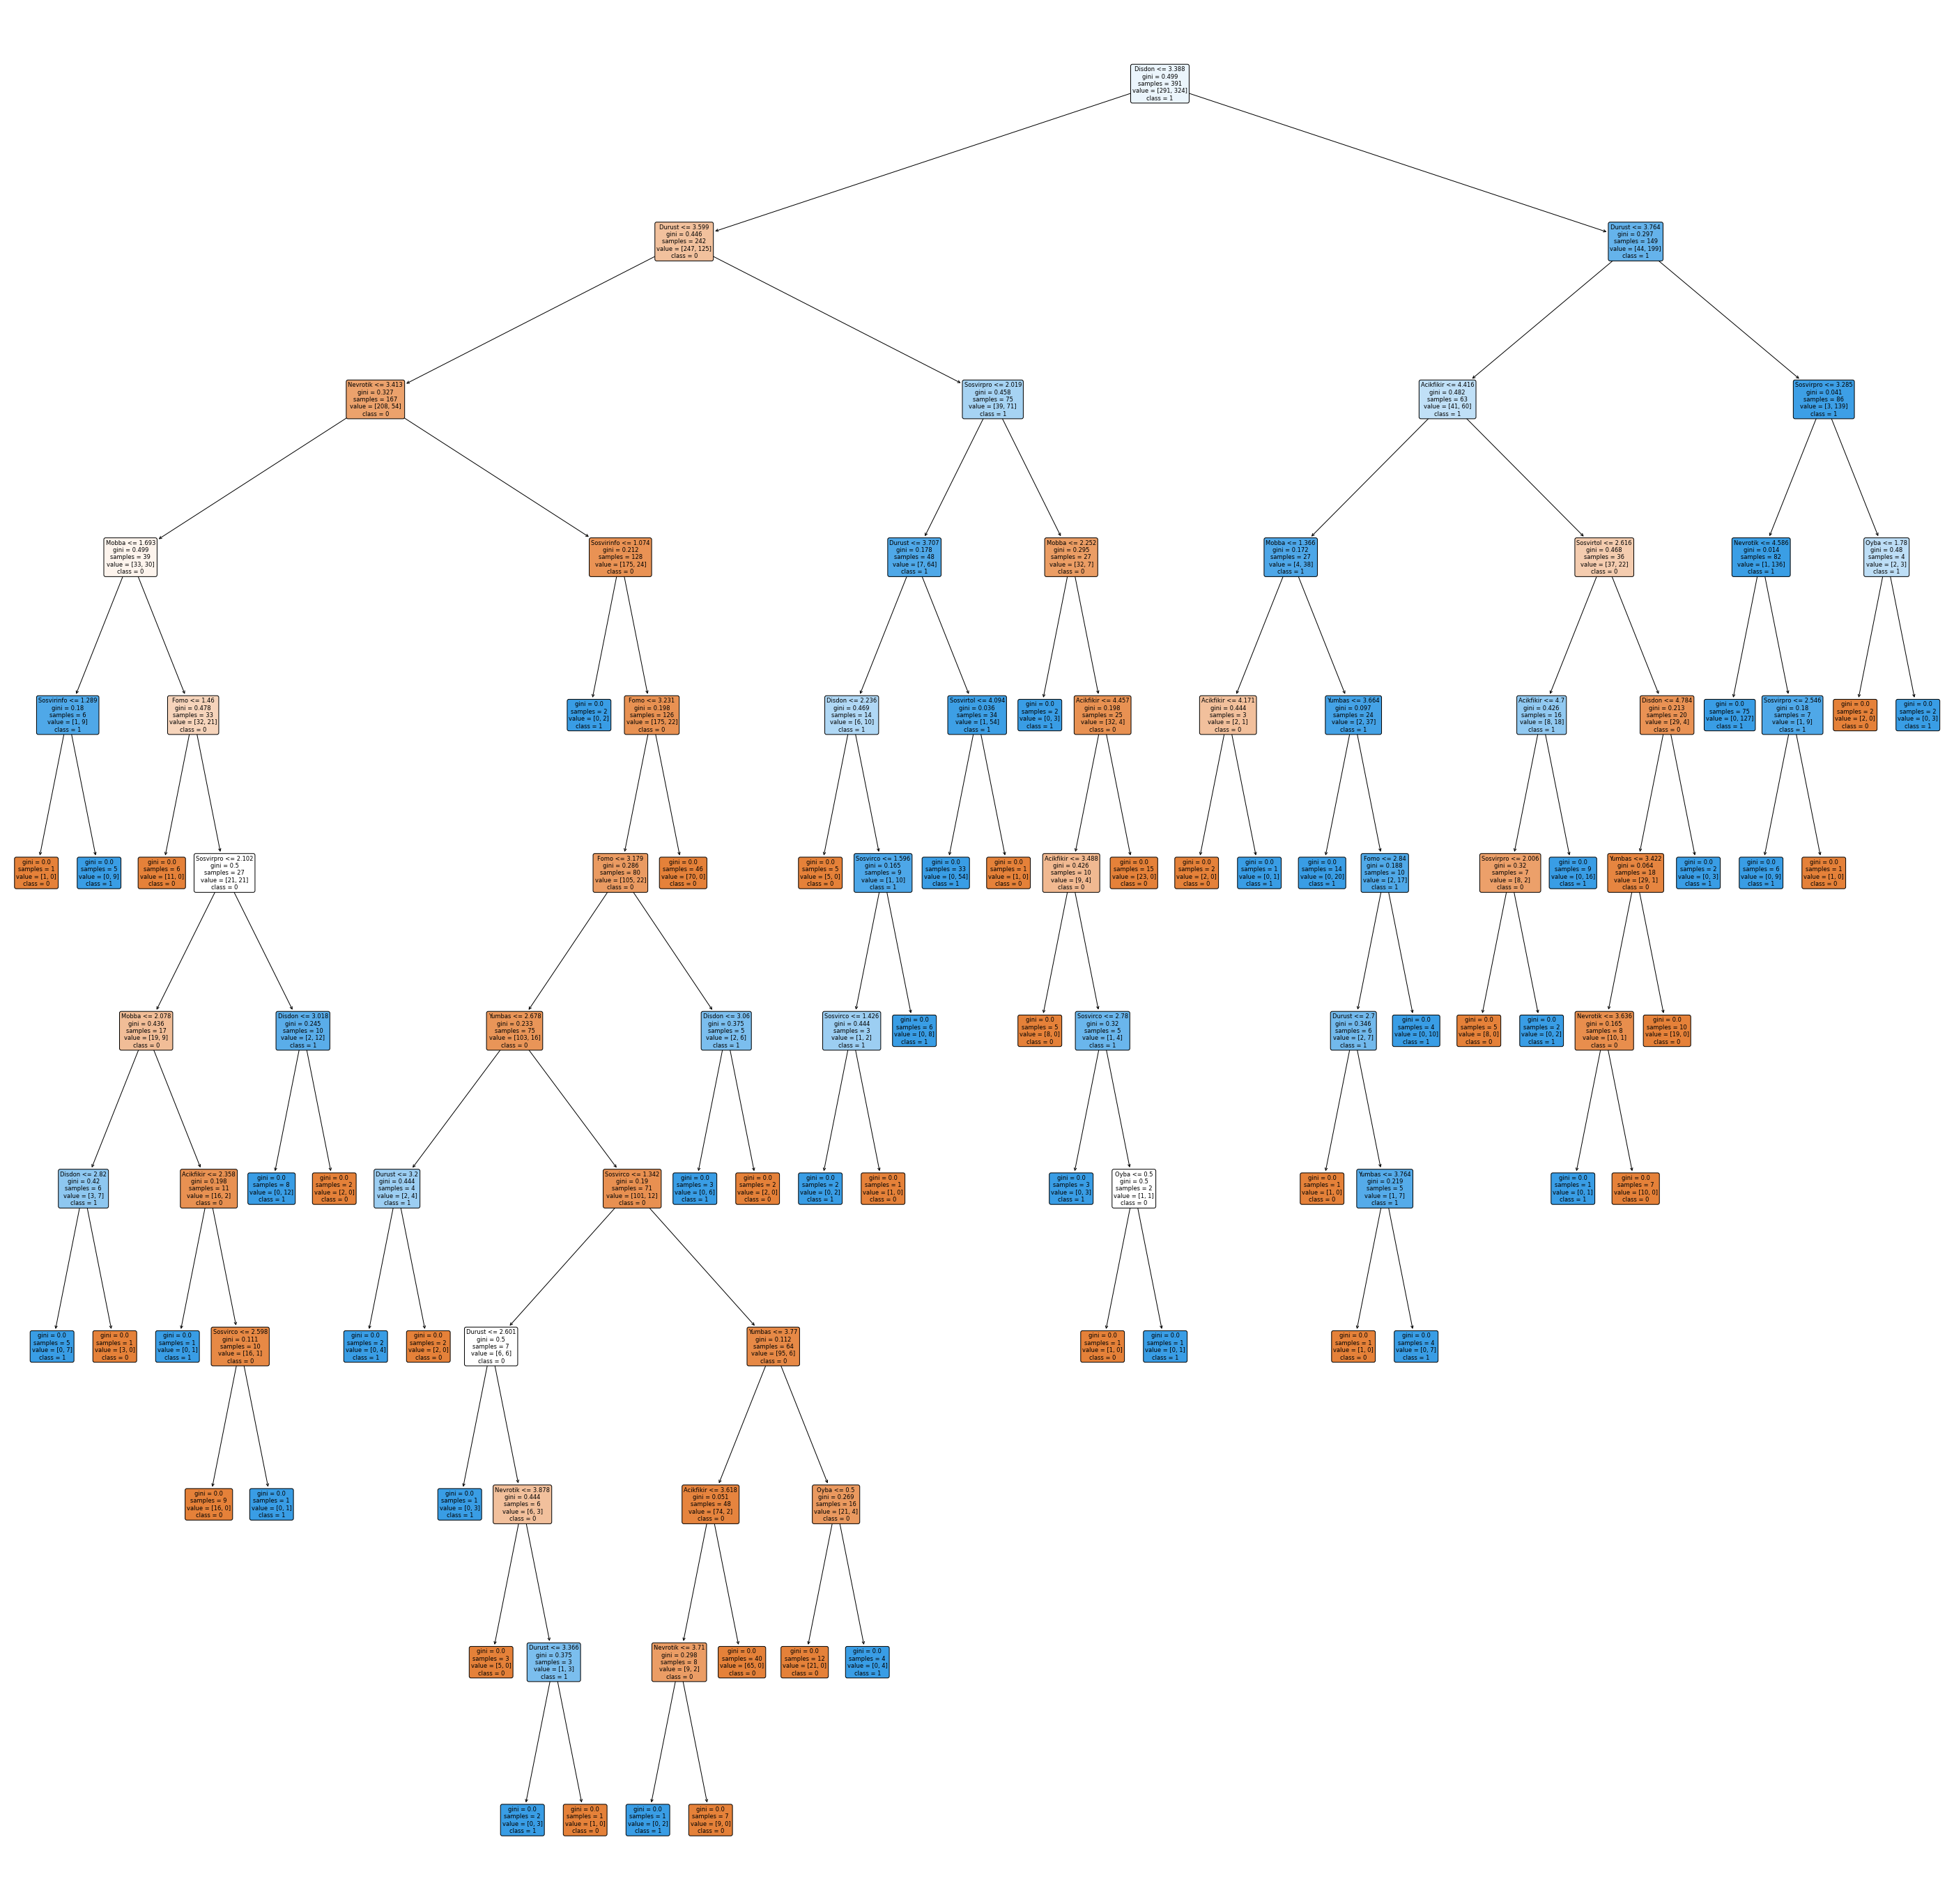

In [75]:
from sklearn import tree

# Visualize Tree
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(rand_f2.estimators_[0],
                   feature_names=["Fomo","Nevrotik","Disdon","Acikfikir","Yumbas","Durust","Mobba","Oyba","Sosvirtol","Sosvirco","Sosvirpro","Sosvirinfo"],
                   class_names=["0","1"],
                   rounded=True,
                   filled=True)